In [1]:
import numpy as np
import pandas as pd
from ham.ham import todf, impute_missing, compare_model, vis_missing

In [13]:
raw_data = np.matrix([[1, 2, 3], [3, np.nan, 5], [9, 22, np.nan]])
raw_data = todf(raw_data, ["H", "A", "M"])
df = impute_missing(raw_data, 'A', "CC", np.NaN)
print(df)

     H     A    M
0  1.0   2.0  3.0
2  9.0  22.0  NaN


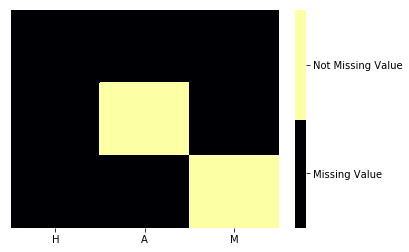

In [14]:
vis_missing(raw_data, missing_val_char = np.nan)

In [16]:
compare_model(raw_data, 'A', ("CC","MIP"), np.nan)

,A,A_after_CC,A_after_MIP
count,2.000000,2.000000,3.0
mean,12.000000,12.000000,12.0
std,14.142136,14.142136,10.0
min,2.000000,2.000000,2.0
25%,7.000000,7.000000,7.0
50%,12.000000,12.000000,12.0
75%,17.000000,17.000000,17.0
max,22.000000,22.000000,22.0
